In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis

In [2]:
faceapp = FaceAnalysis(name='buffalo_sc',
                       root='insightFace_model',
                       providers=['CPUExecutionProvider'])

faceapp.prepare(ctx_id=0, det_size=(640,640), det_thresh=0.5)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightFace_model/models/buffalo_sc/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightFace_model/models/buffalo_sc/w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [3]:
#### Extract Facial Features and labels

In [4]:
os.listdir(path='images')

['teacher-Barack_Obama',
 'student-Angelina Jolie',
 'student-Chris_Evans',
 'teacher-Morgan_Freeman',
 'student-Scarlett Johansson']

In [5]:
import re # regular expression

In [6]:
def clean_name(string):
    # Allow only A-Z a-z
    string = re.sub(r'[^A-Za-z]',' ', string)
    string = string.title()
    return string

In [8]:
person_info = []
listdir = os.listdir(path='images')
for folder_name in listdir:
    role, name = folder_name.split('-')
    name = clean_name(name)
    role = clean_name(role)
    # path of each image in respective folder
    img_files = os.listdir(path= f'images/{folder_name}')
    for file in img_files:
        path = f'./images/{folder_name}/{file}'

        # read image
        img_arr = cv2.imread(path)

        # get the info
        result = faceapp.get(img_arr,max_num = 1)

        if len(result) > 0:
            # extract facial embedding
            res = result[0]
            embedding = res['embedding']
            # save all info name, role, embedding in a list
            person_info.append([name,role,embedding])
            
        
        

In [9]:
dataframe = pd.DataFrame(person_info, columns = ['Name','Role', 'Facial_Features'])
dataframe

,Name,Role,Facial_Features
0,Barack Obama,Teacher,"[0.8677803, -0.26745942, 0.07078171, -0.144091..."
1,Barack Obama,Teacher,"[1.6967494, -0.99423915, -0.22416729, -1.75013..."
2,Barack Obama,Teacher,"[2.277565, -1.3967812, 1.5635507, -1.4799635, ..."
3,Barack Obama,Teacher,"[-0.06508007, 0.01565358, -0.85267746, -0.3290..."
4,Barack Obama,Teacher,"[0.33019817, -1.278012, 0.40063405, -1.3588877..."
5,Barack Obama,Teacher,"[1.4112035, -0.4173997, -0.4473747, -1.4431926..."
6,Barack Obama,Teacher,"[1.6049532, -0.2434924, 0.36104548, 0.04073015..."
7,Barack Obama,Teacher,"[0.5904316, 0.43525362, 0.3595047, -2.803945, ..."
8,Barack Obama,Teacher,"[0.7236616, -0.9442341, -0.08801663, -2.404883..."
9,Barack Obama,Teacher,"[0.048347764, -0.4933409, -0.19507346, -1.1232..."


In [10]:
X_list = dataframe['Facial_Features'].tolist()
X = np.asarray(X_list)

In [11]:
X

array([[ 0.8677803 , -0.26745942,  0.07078171, ..., -0.45287165,
        -0.9386276 , -0.44414908],
       [ 1.6967494 , -0.99423915, -0.22416729, ..., -0.9049543 ,
        -1.3755823 ,  0.46642977],
       [ 2.277565  , -1.3967812 ,  1.5635507 , ...,  1.1965833 ,
        -2.2643585 ,  0.30697325],
       ...,
       [ 0.74071056, -0.2172078 , -2.1699548 , ...,  0.03534096,
        -0.18301532,  0.81163096],
       [ 0.15676695, -0.15236786, -1.1744982 , ..., -0.2912173 ,
        -0.8622711 ,  1.3354315 ],
       [-0.97056913, -0.09710638, -2.1181054 , ..., -1.5109893 ,
        -0.13708332,  1.1790514 ]], dtype=float32)

In [12]:
X.shape


(50, 512)

In [13]:
from sklearn.metrics import pairwise

### Read Test Image

In [14]:
# read test image
img_test = cv2.imread('test_image_3.jpg')
cv2.imshow('test image',img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Extract Feature

In [15]:
res_test = faceapp.get(img_test,max_num=0)
for i, rt in enumerate(res_test):
    print('current loop = ', i)
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score']*100)
    embed_test = rt['embedding']

current loop =  0


In [16]:
# consider only one sample
len(embed_test)

512

In [17]:
y = embed_test.reshape(1,512) # 1 x 512

equlidean_distance = pairwise.euclidean_distances(X,y)
manhattan_distance = pairwise.manhattan_distances(X,y)
cosine_similar = pairwise.cosine_similarity(X,y)

In [18]:
data_search = dataframe.copy()
data_search['equlidean'] = equlidean_distance
data_search['manhattan'] = manhattan_distance
data_search['cosine'] = cosine_similar

In [19]:
data_search

,Name,Role,Facial_Features,equlidean,manhattan,cosine
0,Barack Obama,Teacher,"[0.8677803, -0.26745942, 0.07078171, -0.144091...",37.813831,689.437843,-0.144268
1,Barack Obama,Teacher,"[1.6967494, -0.99423915, -0.22416729, -1.75013...",34.879917,622.583506,-0.170221
2,Barack Obama,Teacher,"[2.277565, -1.3967812, 1.5635507, -1.4799635, ...",36.118626,657.088796,-0.088261
3,Barack Obama,Teacher,"[-0.06508007, 0.01565358, -0.85267746, -0.3290...",38.715687,708.407110,-0.100653
4,Barack Obama,Teacher,"[0.33019817, -1.278012, 0.40063405, -1.3588877...",36.705120,661.289236,-0.083195
5,Barack Obama,Teacher,"[1.4112035, -0.4173997, -0.4473747, -1.4431926...",36.699482,672.606569,-0.080053
6,Barack Obama,Teacher,"[1.6049532, -0.2434924, 0.36104548, 0.04073015...",37.583824,695.927723,-0.098727
7,Barack Obama,Teacher,"[0.5904316, 0.43525362, 0.3595047, -2.803945, ...",37.015812,673.020222,-0.144658
8,Barack Obama,Teacher,"[0.7236616, -0.9442341, -0.08801663, -2.404883...",37.318394,680.352273,-0.087971
9,Barack Obama,Teacher,"[0.048347764, -0.4933409, -0.19507346, -1.1232...",34.765526,636.680165,-0.040528


In [20]:
import matplotlib.pyplot as plt

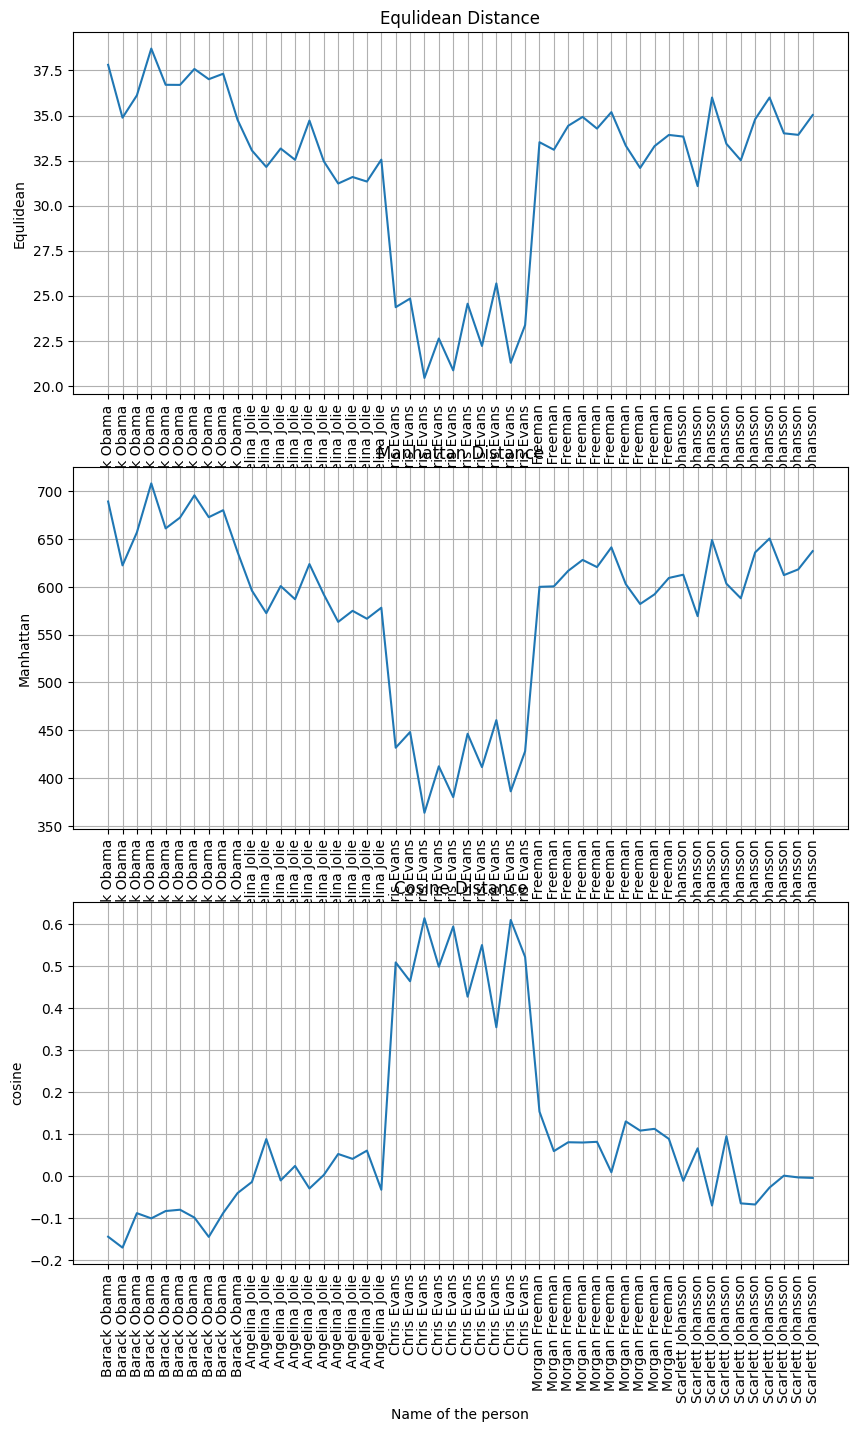

In [21]:
plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
plt.plot(data_search['equlidean'],)
plt.xticks(ticks=list(range(len(data_search['equlidean']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the person')
plt.ylabel('Equlidean')
plt.title('Equlidean Distance')
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan'],)
plt.xticks(ticks=list(range(len(data_search['manhattan']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the person')
plt.ylabel('Manhattan')
plt.title('Manhattan Distance')
plt.grid()

plt.subplot(3,1,3)
plt.plot(data_search['cosine'],)
plt.xticks(ticks=list(range(len(data_search['cosine']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the person')
plt.ylabel('cosine')
plt.title('Cosine Distance')
plt.grid()
plt.show()

### Identify the Person using Equlidean Distance

In [22]:
d_eq_optimal = 25


In [23]:
datafilter = data_search.query(f'equlidean < {d_eq_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['equlidean'].argmin()
    name, role = datafilter.loc[argmin][['Name','Role']]
else:
    name = 'Unknown'
    role = 'Unknown'

In [24]:
print(name, role)

Chris Evans Student


### Identify the Person using Manhattan Distance

In [25]:
d_man_optimal = 450

In [26]:
datafilter = data_search.query(f'manhattan < {d_man_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['manhattan'].argmin()
    name_man, role_man = datafilter.loc[argmin][['Name','Role']]
else:
    name_man = 'Unknown'
    role_man = 'Unknown'

In [27]:
datafilter

,Name,Role,Facial_Features,equlidean,manhattan,cosine
0,Chris Evans,Student,"[1.7499522, -2.120638, -0.15303323, -0.9053567...",24.364048,431.697759,0.508219
1,Chris Evans,Student,"[1.8046337, -2.301599, -1.5814648, -1.1037462,...",24.843203,448.111001,0.463388
2,Chris Evans,Student,"[1.3115609, -2.0907722, -1.0405229, -1.7980812...",20.436251,363.579915,0.613380
3,Chris Evans,Student,"[0.9714033, -1.7574674, -1.3090365, -1.0256081...",22.626955,412.257276,0.497999
4,Chris Evans,Student,"[0.5908869, -1.415056, -0.6726382, -1.310897, ...",20.858637,379.982360,0.593656
5,Chris Evans,Student,"[-1.1621715, -0.68589675, -0.43853605, -2.8765...",24.557310,446.296690,0.426684
6,Chris Evans,Student,"[0.35355112, -0.69770634, -0.30065766, -1.9116...",22.211775,411.392553,0.549559
7,Chris Evans,Student,"[0.44954258, -1.6314547, -0.95116156, -1.54259...",21.281298,386.053922,0.609231
8,Chris Evans,Student,"[0.8585786, -1.1000845, -0.7710812, -1.4918342...",23.368765,427.984712,0.521260


In [28]:
argmin

2

### Identify the Person using Cosine Similarity

In [29]:
S_opt = 0.5

In [30]:
datafilter = data_search.query(f'cosine > {S_opt}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmax = datafilter['cosine'].argmax()
    name_cos, role_cos = datafilter.loc[argmax][['Name','Role']]
else:
    name_cos = 'Unknown'
    role_cos = 'Unknown'

In [31]:
print(name_cos,role_cos)

Chris Evans Student


In [32]:
datafilter

,Name,Role,Facial_Features,equlidean,manhattan,cosine
0,Chris Evans,Student,"[1.7499522, -2.120638, -0.15303323, -0.9053567...",24.364048,431.697759,0.508219
1,Chris Evans,Student,"[1.3115609, -2.0907722, -1.0405229, -1.7980812...",20.436251,363.579915,0.613380
2,Chris Evans,Student,"[0.5908869, -1.415056, -0.6726382, -1.310897, ...",20.858637,379.982360,0.593656
3,Chris Evans,Student,"[0.35355112, -0.69770634, -0.30065766, -1.9116...",22.211775,411.392553,0.549559
4,Chris Evans,Student,"[0.44954258, -1.6314547, -0.95116156, -1.54259...",21.281298,386.053922,0.609231
5,Chris Evans,Student,"[0.8585786, -1.1000845, -0.7710812, -1.4918342...",23.368765,427.984712,0.521260


### Identify Multiple People on an Image

In [33]:
def ml_search_algorithm(dataframe,feature_column,test_vector,name_role=['Name','Role'],thresh=0.5):

    # Take the dataframe
    dataframe = dataframe.copy()
    # Index face embedding from the dataframe and convert into array
    X_list = dataframe[feature_column].tolist()
    x = np.asarray(X_list)

    # Call cosine similarity
    similar = pairwise.cosine_similarity(x,test_vector.reshape(1,-1))
    similar_arr = np.array(similar).flatten()
    dataframe['cosine'] = similar_arr

    # Filter the data
    data_filter = dataframe.query(f'cosine >= {thresh}')
    if len(data_filter) > 0:
        data_filter.reset_index(drop=True,inplace=True)
        argmax = data_filter['cosine'].argmax()
        person_name, person_role = data_filter.loc[argmax][name_role]

    else:
        person_name = 'Unknown'
        person_role = 'Unknown'

    return person_name, person_role

In [34]:
test_image = cv2.imread('test_image_6.jpeg')
cv2.imshow('test image', test_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [37]:
# Take the test image and apply to insight face
results = faceapp.get(test_image)
test_copy = test_image.copy()

# Use a for loop and extract each embedding and pass to ml_search_algorithm
for res in results:
    x1, y1, x2, y2 = res['bbox'].astype(int)
    embeddings = res['embedding']
    person_name, person_role = ml_search_algorithm(dataframe_compress,
                                                  'Facial_Features',
                                                  test_vector = embeddings,
                                                  name_role=['Name','Role'],
                                                  thresh=0.5)

    if person_name == 'Unknown':
        color = (0,0,255)
    else:
        color = (0,255,0)
        
    cv2.rectangle(test_copy,(x1,y1),(x2,y2),color)

    text_gen = person_name
    cv2.putText(test_copy,text_gen,(x1,y1),cv2.FONT_HERSHEY_DUPLEX,0.5,color,1)

cv2.imshow('test image', test_copy)
cv2.waitKey()
cv2.destroyAllWindows()

### Compressing the dataset

In [38]:
dataframe_compress = dataframe.groupby(by=['Name','Role']).mean()
dataframe_compress.reset_index(inplace=True)
dataframe_compress

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.43242043, 1.0748498, -0.12862368, -1.833291..."
1,Barack Obama,Teacher,"[0.9485809, -0.55840516, 0.0948207, -1.2796593..."
2,Chris Evans,Student,"[0.7201716, -1.4684149, -0.7781253, -1.4601074..."
3,Morgan Freeman,Teacher,"[0.48535103, -0.6192554, -0.4069932, 1.0687788..."
4,Scarlett Johansson,Student,"[0.19131958, -0.48843813, -1.690233, 0.4423967..."


In [39]:
xvalues = dataframe_compress.values

In [40]:
col_name = np.array(dataframe_compress.columns)
col_name

array(['Name', 'Role', 'Facial_Features'], dtype=object)

In [41]:
np.savez('dataframe_students_teacher.npz',xvalues,col_name)

In [42]:
file_np = np.load('dataframe_students_teacher.npz',allow_pickle=True)
file_np.files

['arr_0', 'arr_1']

In [43]:
pd.DataFrame(file_np['arr_0'],columns=file_np['arr_1'])

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.43242043, 1.0748498, -0.12862368, -1.833291..."
1,Barack Obama,Teacher,"[0.9485809, -0.55840516, 0.0948207, -1.2796593..."
2,Chris Evans,Student,"[0.7201716, -1.4684149, -0.7781253, -1.4601074..."
3,Morgan Freeman,Teacher,"[0.48535103, -0.6192554, -0.4069932, 1.0687788..."
4,Scarlett Johansson,Student,"[0.19131958, -0.48843813, -1.690233, 0.4423967..."
